### Intro to Quantum Programming - Fall 2022
## Bonus Homework: Due 15/10/2022

For each exercise below, add as many cells as you want. To evaluate your submission, I will do **Restart and Run All**. . For help with Markdown, see [this link](https://www.markdownguide.org/).

In [59]:
# Here's a cell for import statements... add more if necessary (or just import below as needed)
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister,qiskit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT, GroverOperator
import numpy as np

For this assignment you can use the [GroverOperator](https://qiskit.org/documentation/stubs/qiskit.circuit.library.GroverOperator.html) and [QFT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QFT.html) circuits provided by the Qiskit Circuit Library. You can also use other logic circuits provided by the [library](https://qiskit.org/documentation/apidoc/circuit_library.html).

----
#### Exercise 3.1

In games like *Candy Crush* or *Bejeweled*, the player tries to swap pieces to make three in a row, either horizontally or vertically. For this exercise, use the Grover search algorithm to determine whether a single swap between two rows will create a match. (We will only consider swapping between two rows to create a horizontal match.)

We will have only two kinds of items -- red balls (1) and blue balls (0). There will be two rows of three balls, each represented by a binary value.  For example, here is a row of Blue, Blue, Red on top, and Red, Red, Blue on bottom:
```
001
110
```
For this example, swapping the balls on the right will result in a match on both the top and bottom rows.

For some arrangements, there are two possible swaps.  For example, swapping on the right or the left will result in a match.
```
011
110
```

If the two rows are the same, then no swap will work:
```
110
110
```

You may assume that a configuration that already contains a match (000 or 111) will not be entered.

Create a quantum circuit that finds either one or two moves, given an initial configuration of the two rows. Your circuit must use 6 qubits to represent the row state, and the `rowPrep` function below is given to simplify the preparation of those qubits. You can change the `rowPrep` code as needed (e.g., to initialize qubits in a way that fits your circuit), but the interface must remain the same.

Your circuit must use Grover's algorithm to find a solution, or find that there is no solution.

Use the QASM simulator to demonstrate your circuit. Your demonstration code must interpret the results and print a solution, if there is one, or say that there is no solution. (In other words, the interpretation of your result must be automated, so that a clear answer is presented to the reader -- don't just print a histogram and have the reader figure it out.) 

Make sure the initialization procedure for your demonstration is clear, as well as the procedure to run the demo. I will want to test with multiple row configurations.

In [54]:
# arguments are two three-char strings with '1' and '0'
# first argument is top row (e.g., '110') and second is bottom row (e.g., '001')
# initialization has top row in lowest three bits, bottom in highest three (e.g., 001110)
import math
def rowPrep(top, bottom):
    sv = Statevector.from_label(bottom+top)
    qc = QuantumCircuit(6, name='prep')
    qc.initialize(sv.data, list(range(0,6)))
    num_list = list(top+bottom)
    num_list = [int(i) for i in num_list]
    result_action = []
    for i in [(0,3),(1,4),(2,5)]:
        test_list = num_list.copy()
        test_list[i[0]], test_list[i[1]] = test_list[i[1]], test_list[i[0]]
        if (test_list[0] ==  test_list[1] and test_list[1] == test_list[2]) or (test_list[3] ==  test_list[4] and test_list[4] == test_list[5]):
            result_action.append(i)
    for i in range(len(num_list)):
        qc.h(i)
    for i in result_action:
        qc.p(math.pi,i[0])
        qc.p(math.pi,i[1])
    return qc

In [57]:
oracle = rowPrep("110","001")
# oracle.draw('mpl')
grover_op = GroverOperator(oracle, insert_barriers=True)
# grover_op.decompose().draw()
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
API_KEY = "f72df63f9da5ef98743365dcc45edacc7638e8972d99847c758d4aea7bb88ffd5e47d932d87d66a4f749eb6ddc93ca10114822c43488ee0060ac55126d1a3787"
IBMQ.save_account(API_KEY, overwrite=True)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2022-10-15 23:04:19,605: Credentials are already in use. The existing account in the session will be replaced.


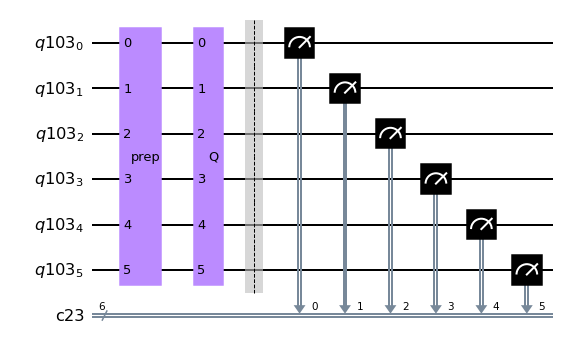

In [75]:
q = QuantumRegister(6)
c = ClassicalRegister(6)
qc = QuantumCircuit(q,c)
qc.append(oracle, range(6))
qc.append(grover_op, range(6))
qc.barrier()
qc.measure(q,c)
qc.draw("mpl")

In [77]:
job = qiskit.execute(qc, backend)
result = job.result()
print(result.get_counts(qc))

{'000000': 66, '000001': 54, '010000': 64, '010001': 68, '010010': 57, '010011': 76, '010100': 49, '010101': 64, '010110': 58, '010111': 55, '011000': 54, '011001': 57, '011010': 48, '011011': 67, '011100': 63, '011101': 62, '011110': 65, '011111': 79, '000010': 51, '100000': 66, '100001': 67, '100010': 53, '100011': 55, '100100': 55, '100101': 62, '100110': 71, '100111': 73, '101000': 61, '101001': 59, '101010': 57, '101011': 63, '101100': 69, '101101': 70, '101110': 60, '101111': 64, '000011': 58, '110000': 67, '110001': 64, '110010': 52, '110011': 68, '110100': 48, '110101': 63, '110110': 63, '110111': 57, '111000': 71, '111001': 61, '111010': 64, '111011': 70, '111100': 70, '111101': 62, '111110': 56, '111111': 68, '000100': 51, '000101': 70, '000110': 77, '000111': 72, '001000': 60, '001001': 71, '001010': 75, '001011': 49, '001100': 55, '001101': 63, '001110': 72, '001111': 61}


----
#### Exercise 3.2

Use the Qiskit ``QFT`` circuit to generate the same state prepared by Example 7-5 in the textbook. Do not directly implement the gates in Figure 7-21 or Figure 7-25; you must use the ``QFT`` circuit. Clearly demonstrate that the proper state is being generated.

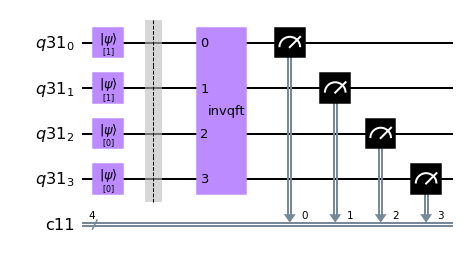

In [15]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
qc.initialize(1, 0)
qc.initialize(1, 1)
qc.initialize(0, 2)
qc.initialize(0, 3)
qc.barrier()
qc.append(QFT(4, do_swaps=False, inverse=True, insert_barriers=False, name='invqft'),q)
qc.measure(q,c)
qc.draw('mpl')

#### Exercise 3.3

Use the Qiskit ``QFT`` circuit to generate the same state prepared by Example 7-6 in the textbook. Do not directly implement the gates in Figure 7-22; you must use the ``QFT`` circuit. Clearly demonstrate that the proper state is being generated.

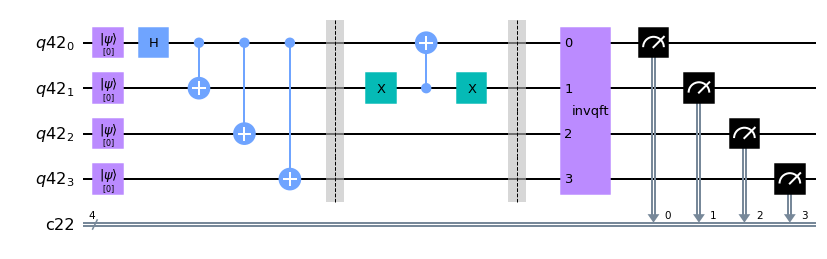

In [26]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
qc.initialize(0, 0)
qc.initialize(0, 1)
qc.initialize(0, 2)
qc.initialize(0, 3)
qc.h(0)
qc.cx(0,1) #control 1, control 2, target
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.x(1)
qc.cx(1,0)
qc.x(1)
qc.barrier()
qc.append(QFT(4, do_swaps=False, inverse=True, insert_barriers=False, name='invqft'),q)
qc.measure(q,c)
qc.draw('mpl')

#### Exercise 3.4

Using the [code from the textbook](https://oreilly-qc.github.io/?p=9-3) (Example 9-3) as a guide, implement a function that takes a vector (a list of values) and returns a circuit that contains an amplitude-encoded version of the vector. There is no Qiskit code with the example, so this is essentially a matter of porting the code from QCEngine to Qiskit. (Remember that QCEngine expresses angles in degrees, while Qiskit uses radians.)

Demonstrate your function with the three vectors from **Table 9-1**. Also demonstrate your code with *one eight-element vector*, to show that it works with any vector with $2^n$ elements. The input vector does not need to be normalized. I will also test your code with one or more vectors of my choosing.

**Do not use the Qiskit Initialize instruction to do this.** Follow the code in the textbook. It would be nice if you understand the code, but it's not strictly necessary, as long as it works. Though it's not exactly the same, the discussion in section 2.9 of the Dervoric paper (posted on Moodle) may give you some insight.